<a href="https://colab.research.google.com/github/manojagragari/SECURE-FILE-MANAGEMENT-SYSTEM/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing csv file and Display the first few rows and basic info


import pandas as pd

# Load the dataset
df = pd.read_csv(r"python project.csv")


df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   T31                                               2155 non-null   object
 1   Tourist/visitor arrivals and tourism expenditure  2154 non-null   object
 2   Unnamed: 2                                        2155 non-null   object
 3   Unnamed: 3                                        2155 non-null   object
 4   Unnamed: 4                                        1100 non-null   object
 5   Unnamed: 5                                        1 non-null      object
 6   Unnamed: 6                                        2155 non-null   object
 7   Unnamed: 7                                        834 non-null    object
 8   Unnamed: 8                                        2155 non-null   object
dtypes: object(9)
memory usage: 151.

(                   T31 Tourist/visitor arrivals and tourism expenditure  \
 0  Region/Country/Area                                              NaN   
 1                    4                                      Afghanistan   
 2                    4                                      Afghanistan   
 3                    8                                          Albania   
 4                    8                                          Albania   
 
   Unnamed: 2                                    Unnamed: 3  \
 0       Year                                        Series   
 1       2010  Tourism expenditure (millions of US dollars)   
 2       2020  Tourism expenditure (millions of US dollars)   
 3       2010          Tourist/visitor arrivals (thousands)   
 4       2020          Tourist/visitor arrivals (thousands)   
 
                      Unnamed: 4                             Unnamed: 5  \
 0  Tourism arrivals series type  Tourism arrivals series type footnote   
 1          

In [ ]:
# removing and preparing data for visualisation


# Drop the first row (it contains headers/descriptions, not data)
df_clean = df.drop(index=0).copy()

# Rename columns for clarity
df_clean.columns = [
    "Code", "Country", "Year", "Metric", "Arrival_Type",
    "Arrival_Footnote", "Value", "Footnotes", "Source"
]

# Keep only relevant columns
df_clean = df_clean[["Country", "Year", "Metric", "Value"]]

# Drop rows with missing essential data
df_clean = df_clean.dropna(subset=["Country", "Year", "Metric", "Value"])

# Convert Year to int and Value to numeric
df_clean["Year"] = df_clean["Year"].astype(int)
df_clean["Value"] = df_clean["Value"].str.replace(",", "").astype(float)

# Pivot data: rows = Country-Year, columns = Metric (Arrivals / Expenditure)
df_pivot = df_clean.pivot_table(
    index=["Country", "Year"],
    columns="Metric",
    values="Value",
    aggfunc="first"
).reset_index()

df_pivot.columns.name = None  # remove index name

df_pivot.head()


,Country,Year,Tourism expenditure (millions of US dollars),Tourist/visitor arrivals (thousands)
0,Afghanistan,2010,147.0,NaN
1,Afghanistan,2020,75.0,NaN
2,Albania,1995,70.0,NaN
3,Albania,2005,880.0,NaN
4,Albania,2010,1778.0,2191.0


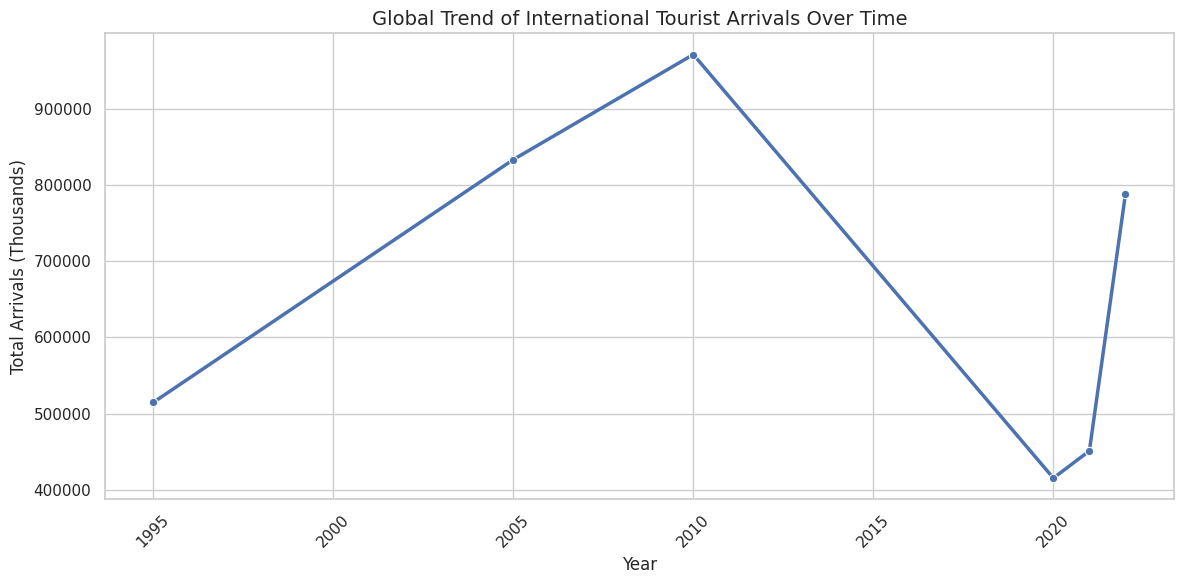

In [ ]:
# Objective 1: Trend of Tourist Arrivals Over Time.


import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Objective 1: Trend of Tourist Arrivals Over Time (all countries combined)
arrival_trend = df_pivot.groupby("Year")["Tourist/visitor arrivals (thousands)"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=arrival_trend, x="Year", y="Tourist/visitor arrivals (thousands)", marker="o", linewidth=2.5)
plt.title("Global Trend of International Tourist Arrivals Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Arrivals (Thousands)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-5-13745a59bdb1>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


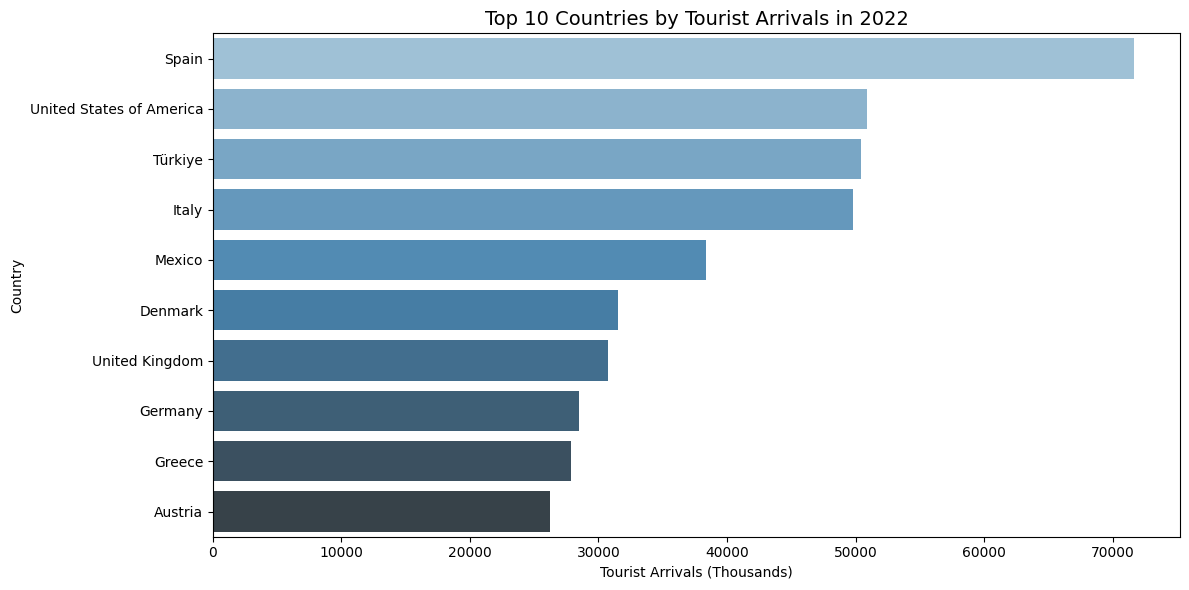

In [ ]:
#objective 2 #top ten tourist arrival country


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("python project.csv")

# Drop the first row (it’s just header notes)
df = df.drop(index=0).copy()

# Rename columns
df.columns = [
    "Code", "Country", "Year", "Metric", "Arrival_Type",
    "Arrival_Footnote", "Value", "Footnotes", "Source"
]

# Keep only necessary columns
df = df[["Country", "Year", "Metric", "Value"]]
df = df.dropna(subset=["Country", "Year", "Metric", "Value"])

# Convert types
df["Year"] = df["Year"].astype(int)
df["Value"] = df["Value"].str.replace(",", "")
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# Pivot to wide format
df_pivot = df.pivot_table(
    index=["Country", "Year"],
    columns="Metric",
    values="Value",
    aggfunc="first"
).reset_index()

# Clean up columns
df_pivot.columns.name = None

# Filter the latest year with available data
latest_year = df_pivot.dropna(subset=["Tourist/visitor arrivals (thousands)"])["Year"].max()
latest_data = df_pivot[df_pivot["Year"] == latest_year]

# Get top 10 countries by tourist arrivals
top_arrivals = latest_data.nlargest(10, "Tourist/visitor arrivals (thousands)")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_arrivals,
    x="Tourist/visitor arrivals (thousands)",
    y="Country",
    palette="Blues_d"
)
plt.title(f"Top 10 Countries by Tourist Arrivals in {latest_year}", fontsize=14)
plt.xlabel("Tourist Arrivals (Thousands)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


<ipython-input-6-4881de179a88>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


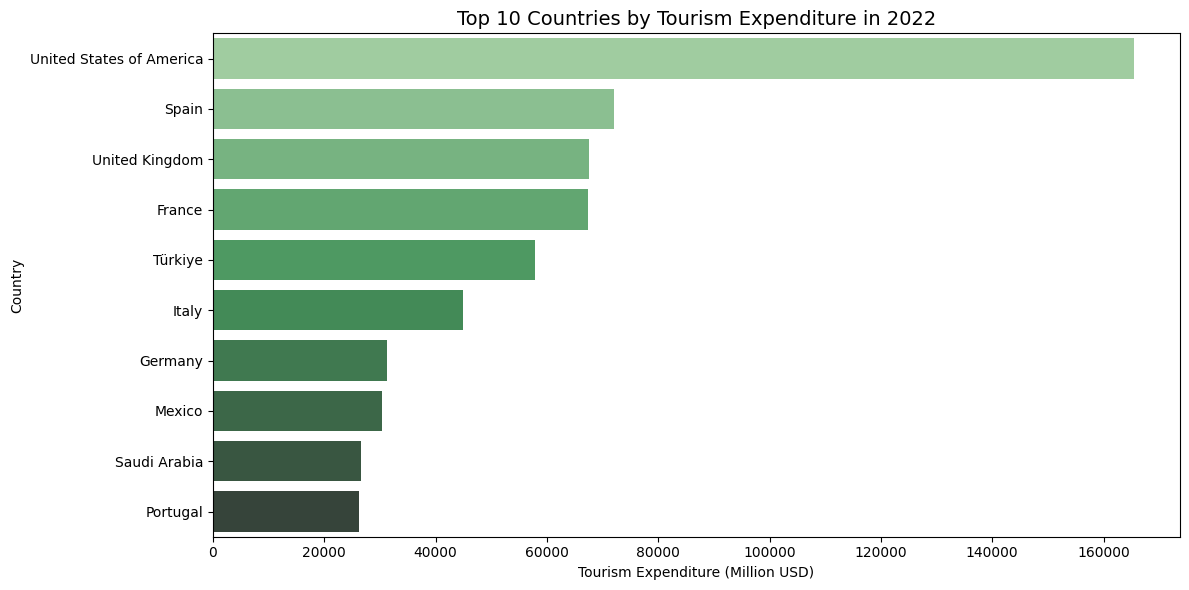

In [ ]:
# objective 3 Top 10 Countries by Tourism Expenditure (Most Recent Year)

# Get top 10 countries by tourism expenditure
top_expenditure = latest_data.nlargest(10, "Tourism expenditure (millions of US dollars)")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_expenditure,
    x="Tourism expenditure (millions of US dollars)",
    y="Country",
    palette="Greens_d"
)
plt.title(f"Top 10 Countries by Tourism Expenditure in {latest_year}", fontsize=14)
plt.xlabel("Tourism Expenditure (Million USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


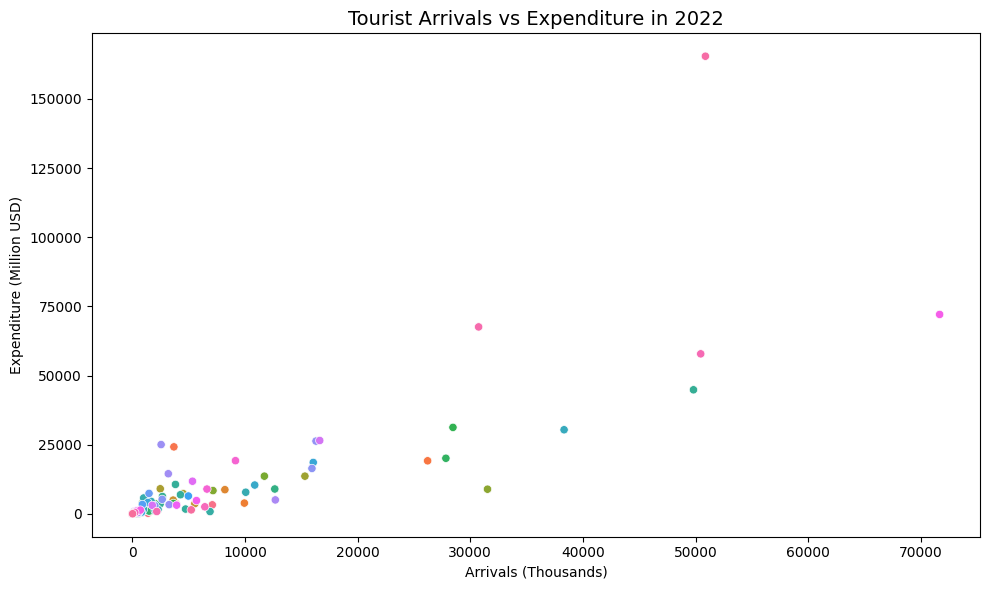

In [ ]:
# Objective 4: Comparison – Arrivals vs. Expenditure


# Scatter plot: Arrivals vs Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=latest_data,
    x="Tourist/visitor arrivals (thousands)",
    y="Tourism expenditure (millions of US dollars)",
    hue="Country"
)
plt.title(f"Tourist Arrivals vs Expenditure in {latest_year}", fontsize=14)
plt.xlabel("Arrivals (Thousands)")
plt.ylabel("Expenditure (Million USD)")
plt.legend([],[], frameon=False)  # hide legend for clarity
plt.tight_layout()
plt.show()


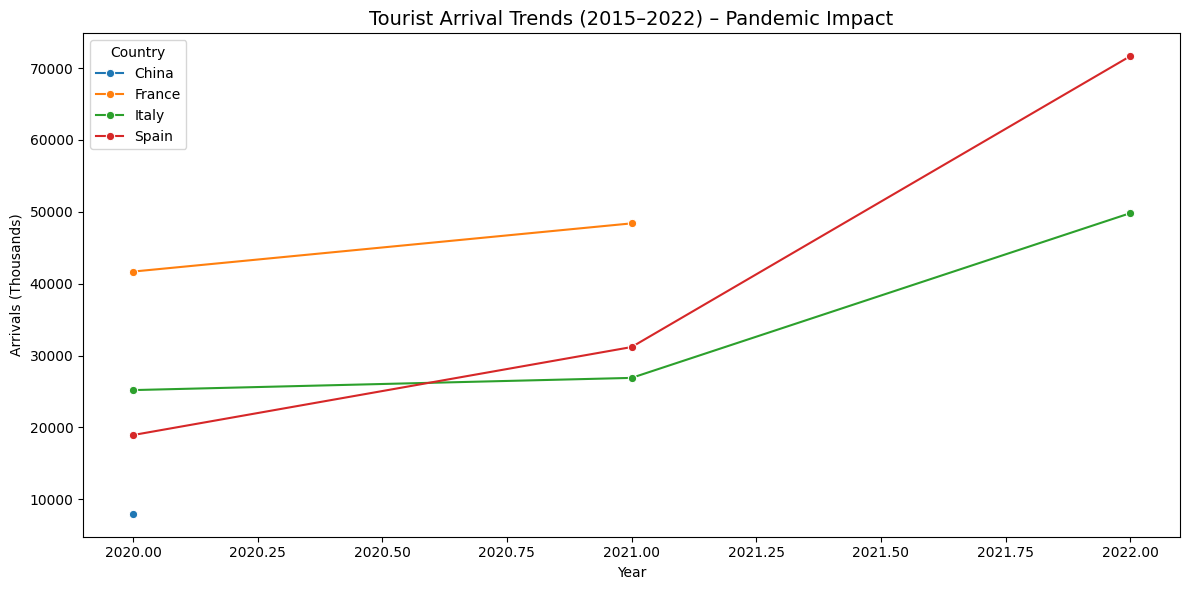

In [ ]:
# Objective 5: Growth in Tourist Arrivals (Pre vs Post Pandemic)


# Filter a few countries and years around the pandemic
selected_countries = ["France", "United States", "China", "Italy", "Spain"]
years_range = df_pivot[df_pivot["Country"].isin(selected_countries) & df_pivot["Year"].between(2015, 2022)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=years_range,
    x="Year",
    y="Tourist/visitor arrivals (thousands)",
    hue="Country",
    marker="o"
)
plt.title("Tourist Arrival Trends (2015–2022) – Pandemic Impact", fontsize=14)
plt.ylabel("Arrivals (Thousands)")
plt.tight_layout()
plt.show()


<ipython-input-9-d97ff71db514>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data["Expenditure per Tourist (USD)"] = (
<ipython-input-9-d97ff71db514>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


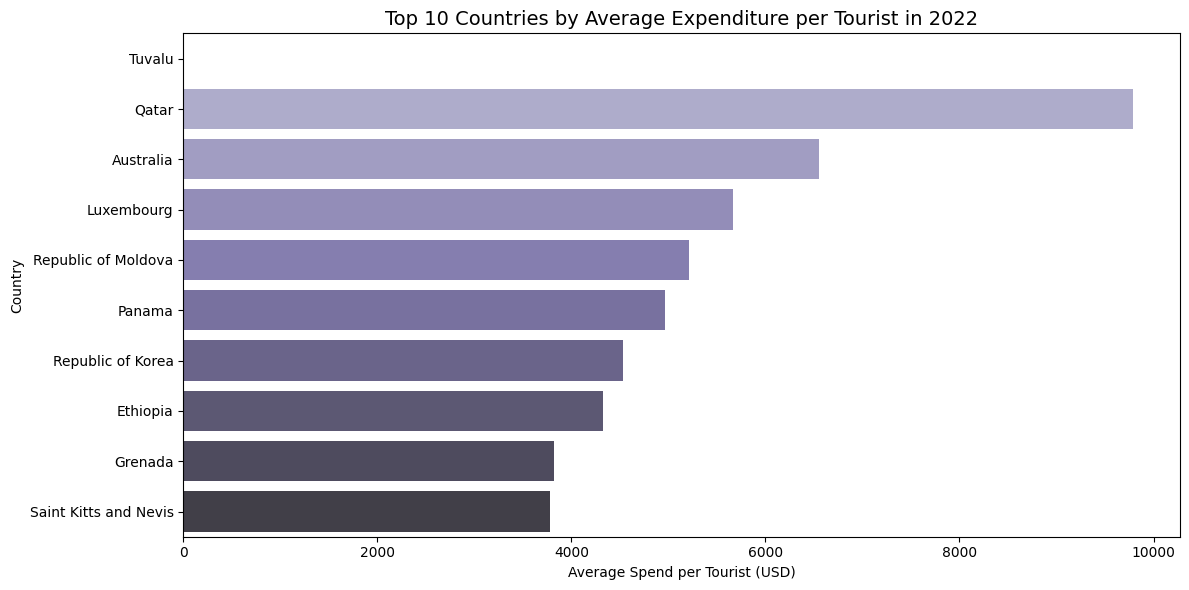

In [ ]:
#  Objective 6: Average Expenditure Per Tourist by Country

# Calculate spending per tourist
latest_data["Expenditure per Tourist (USD)"] = (
    latest_data["Tourism expenditure (millions of US dollars)"] * 1_000_000
    / (latest_data["Tourist/visitor arrivals (thousands)"] * 1_000)
)

# Get top 10 high-value destinations
top_spending_per_visitor = latest_data.sort_values(
    "Expenditure per Tourist (USD)", ascending=False
).dropna().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_spending_per_visitor,
    x="Expenditure per Tourist (USD)",
    y="Country",
    palette="Purples_d"
)
plt.title(f"Top 10 Countries by Average Expenditure per Tourist in {latest_year}", fontsize=14)
plt.xlabel("Average Spend per Tourist (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
